In [21]:
!apt-get update

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz

!tar xf spark-2.3.1-bin-hadoop2.7.tgz

!pip install -q findspark



import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"



!ls



import findspark

findspark.init()



import pyspark

from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate() 

spark

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [22]:
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java


In [23]:
!java -version

openjdk version "1.8.0_312"
OpenJDK Runtime Environment (build 1.8.0_312-8u312-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.312-b07, mixed mode)


In [ ]:
# from pyspark.conf import SparkConf

In [24]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("WordCount")\
    .getOrCreate()

In [25]:
sc=spark.sparkContext

In [27]:
text = spark.read.text("content/*")
text=text.rdd

In [ ]:
# text.createOrReplaceTempView("text")

In [ ]:
# spark.sql("""
# select * 
# from text
# order by length(value)
# """).show()

In [ ]:
# df=spark.sql("select * from xxx")
# df.write.mode('overwrite').parquet("content/agg.parquet")
# spark.sql("select * from xxx").write.mode('overwrite').parquet("content/agg.parquet")

['value']

In [28]:
def lower_clean_str(x):
  punc='!"#$%&\'()*+,./:;“”<=>?@[\\]^_`{|}~-1234567890'
  lowercased_str = x.value.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch, '')
  return lowercased_str

In [29]:
text_new = text.map(lower_clean_str)

In [30]:
text_count = text_new.flatMap(lambda x: x.split(' '))\
                .map(lambda x: (x, 1))

In [33]:
text_count = text_count.reduceByKey(lambda x, y: x+y)

In [34]:
text_count.count()

938

In [35]:
df1=text_count.toDF().sort('_2',ascending=False).toPandas()

In [36]:
df1=df1.rename(columns={"_1": "word", "_2": "cnt"})

In [37]:
import nltk
from nltk.corpus import stopwords

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
stopwords=stopwords.words('english')

In [46]:
df1 = df1[~df1['word'].isin(stopwords)]
n=10
result=df1.iloc[2:].head(n)

In [47]:
df1.head(n)

,word,cnt
5,,106
6,�,67
7,russian,46
8,russia,40
9,world,39
11,ioc,37
13,belarus,33
15,athletes,31
25,olympic,25
26,ukraine,24


In [ ]:
# df1.count()

Визуализация

In [48]:
result.to_csv(f"top{n}_words.csv")

In [49]:
result['word']=result['word'].astype(str)

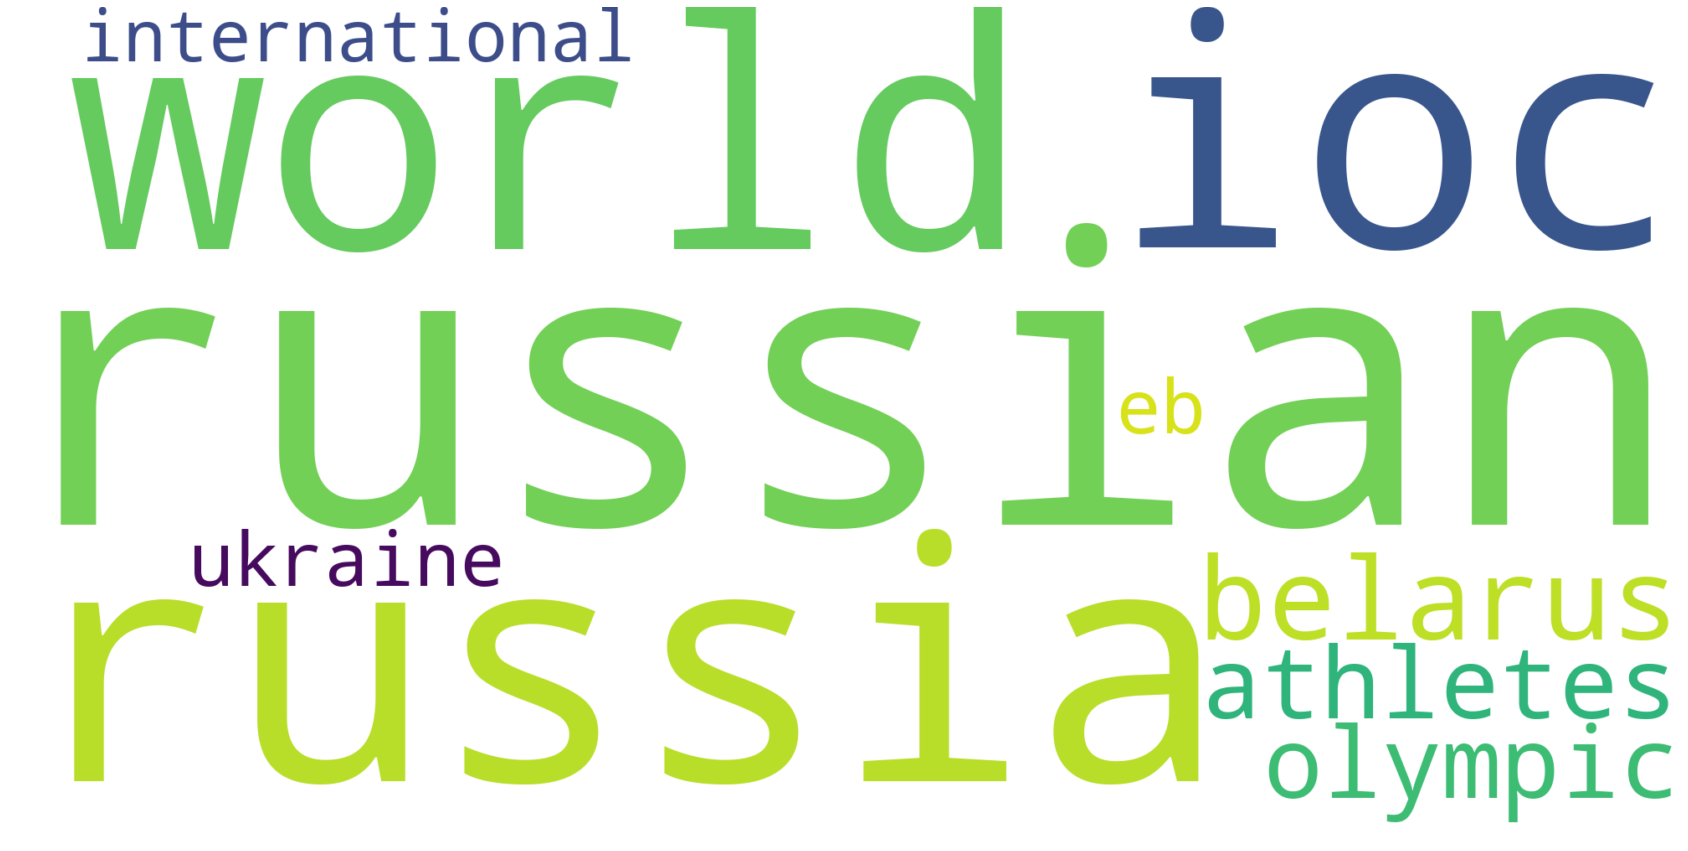

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

text = ' '.join(result.word.values)
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, collocations=False, background_color="white").generate(text)
plt.figure(figsize=(30, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()